 # TIME SERIES SALES FORCASTING - REGRESSION
 
## BUSINESS UNDERSTANDING 

### INTRODUCTION

Time series forecasting is one of the key topics of machine learning. The fact that so many prediction issues have a temporal component makes it crucial. In contrast to many other prediction tasks, time series issues are more challenging since the time component contributes more information.

#### TIME SERIES FORCASTING APPLICATION 
Time series forecasting is employed in various sectors, including finance, supply chain management, production, and inventory planning, making it one of the most widely used data science approaches. Time series forecasting has many applications, including resource allocation, business planning, weather forecasts, and stock price prediction.

Time series forecasting can be used by any business or organization dealing with continuously generated data and the requirement to adjust to operational shifts and changes. Here, machine learning acts as the greatest enabler, improving our ability to:

#### Web traffic forecasting: 
In order to forecast online traffic rates during certain periods, common data on typical traffic rates among competing websites is combined with input data on traffic-related trends.

#### Sales and demand forecasting: 
Customer behavior pattern data, in combination with inputs from purchase history, demand history, seasonal influence, etc., enables machine learning models to identify the most demanded items and pinpoint their placement in the dynamic market.

#### Weather prediction: 
Time-based data is routinely collected from a variety of globally networked weather stations, and machine learning approaches enable in-depth analysis and interpretation of the data for future forecasts based on statistical dynamics.

#### Stock price forecasting: 
In order to make accurate forecasts of the most likely impending stock price movements, one can integrate historical stock price data with information on regular and atypical spikes and decreases in the stock market.

#### Economic and demographic forecasting: 
Demographics and economics have a ton of statistical data that can be utilized to forecast time series data effectively. Consequently, the ideal target market can be determined, and the most effective strategies to communicate with that specific TA may be developed.

#### Academics: 
The concepts of machine learning and deep learning greatly speed up the processes of refining and launching scientific ideas. For instance, scientific data that must go through infinite analytical cycles may be analyzed considerably more quickly with machine learning patterns.

### PROJECT OBJECTIVE
In this project, we'll predict store sales on data from Corporation Favorita, a large Ecuadorian-based grocery retailer.

We shall also build a model that will accurately predicts the unit sales for thousands of items sold at different Favorita stores.

### HYPOTHESIS STATEMENT
Null Hypothesis:Sales are not affected by promotions, oil prices and holidays. 

Alternate Hypothesis: Sales are affected by promotions, oil prices and holidays

### ANALYTICAL QUESTIONS

1) Is the train dataset complete (has all the required dates)?

2) Which dates have the lowest and highest sales for each year?

3) Did the earthquake impact sales?

4) Are certain groups of stores selling more products? (Cluster, city, state, type)

5) Are sales affected by promotions, oil prices and holidays?

6) What analysis can we get from the date and its extractable features?

7) What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)


## IMPORTING RELEVANT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import pyodbc    
from dotenv import dotenv_values

import statsmodels.api as sm

##Visualization Libraries 
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
import random
import plotly.offline as offline
offline.init_notebook_mode(connected=True) # Configure Plotly to run offline


# Feature Processing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


#Algorithms libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
import xgboost

##pipelines and transformers 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.pipeline import make_pipeline

##handling imbalance datasets
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

##hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

##for hypothesis testing 
from scipy.stats import chi2_contingency

##model evaluation:
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

# Other packages
import os
from itertools import product
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# DATA UNDERSTANDING


## LOADING ALL DATASETS

Firstly, we shall fetch some datasets from sql server using the method below:

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password=environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [3]:
# Use the connect method of the pyodbc library and pass in the connection string.
#This will connect to the server
connection = pyodbc.connect(connection_string)

In [4]:
# Now the sql query to get the 1st data 
query = "Select * from dbo.oil"
oil = pd.read_sql(query,connection)

#oil.to_csv('oil.csv')  

oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997
...,...,...
1213,2017-08-25,47.650002
1214,2017-08-28,46.400002
1215,2017-08-29,46.459999
1216,2017-08-30,45.959999


In [5]:
# Now the sql query to get the 2nd data 
query = "Select * from dbo.holidays_events"
holidays = pd.read_sql(query,connection)

#holidays.to_csv('holidays.csv')  

holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [6]:
# Now the sql query to get the 3rd data 
query = "Select * from dbo.stores"
stores = pd.read_sql(query,connection)

#stores.to_csv('stores.csv')  

stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [7]:
sample_submission = pd.read_csv("sample_submission.csv")

sample_submission

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


In [8]:
test = pd.read_csv("test.csv")

test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [9]:
transactions = pd.read_csv("transactions.csv")

transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [10]:
train = pd.read_excel("train.xlsx")

train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
1048570,1048570,2014-08-13,3,POULTRY,974.098,1
1048571,1048571,2014-08-13,3,PREPARED FOODS,324.293,0
1048572,1048572,2014-08-13,3,PRODUCE,10.000,1
1048573,1048573,2014-08-13,3,SCHOOL AND OFFICE SUPPLIES,0.000,0


## Exploratory Data Analysis (EDA)

In [11]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [12]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [13]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [14]:
sample_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [15]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [16]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [17]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [18]:
# creating a list of the datasets

list_datasets = [stores, train, test, transactions, oil, holidays, sample_submission]

In [19]:
# creating a function that will Check for the info on all the datasets

def general_info(datasets):
    for data in datasets:
        variable_name  = globals()
        print(data.info())
#         print('\n')
        print('_' * 50)

In [20]:
general_info(list_datasets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1048575 non-null  int64         
 1   date         1048575 non-null  datetime64[ns]
 2   store_nbr    1048575 non-null  int64         
 3   family       1048575 non-null  object        
 4   sales        1048575 non-null  float64       
 5   onpromotion  1048575 non-null  int64         

In [21]:
# creating a function that will Check for the missing values on all the datasets

def show_missing_val(datasets):
    for data in datasets:
        print(data.isnull().sum())
        print('_' * 50)

In [22]:
show_missing_val(list_datasets)

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
__________________________________________________
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
__________________________________________________
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64
__________________________________________________
date            0
store_nbr       0
transactions    0
dtype: int64
__________________________________________________
date           0
dcoilwtico    43
dtype: int64
__________________________________________________
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
__________________________________________________
id       0
sales    0
dtype: int64
__________________________________________________


Only the oil dataset has missing values.

### FILLING THE MISSING VALUES ON THE OIL DATASET

In [23]:
# FILLING THAT MISSING DATA ON OIL DATASET USING SIMPLEIMPUTER WITH MEAN STRATEGY

imputer = SimpleImputer(strategy='mean')

# fitting the imputer to the 'dcoilwtico' column of the oil dataset

imputer.fit(oil[['dcoilwtico']])



SimpleImputer()

In [24]:
# Impute the missing values on the 'dcoilwtco' column
oil['dcoilwtico'] = imputer.transform(oil[['dcoilwtico']])



In [25]:
oil.head()

,date,dcoilwtico
0,2013-01-01,67.714366
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [26]:
oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

In [27]:
# CONVERTING ALL THE DATASET 'DATE COLUMNS' TO DATE TIME

train['date'] = pd.to_datetime(train['date'])

oil['date'] = pd.to_datetime(oil['date'])

holidays['date'] = pd.to_datetime(holidays['date'])

transactions['date'] = pd.to_datetime(transactions['date'])


## COMBINING ALL THE DATASETS BASED ON COMMON COLUMNS

In [29]:
# Merging the Transaction dataset to the Train on 'date' and 'store_nbr' columns

data = pd.merge(train, transactions, on = ['date', 'store_nbr'], how='left')

# Merging the holidays dataset to df on 'date' column

data2 = pd.merge(data, holidays, on = 'date', how='left')

# Merging oil dataset to df2 on 'date' column

data3 = pd.merge(data2, oil, on = 'date', how='left')


# Merging the store dataset to df3 on 'store_nbr' column

train_data = pd.merge(data3, stores, on = 'store_nbr', how='left')



In [30]:
train_data

,id,date,store_nbr,family,sales,onpromotion,transactions,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064608,1048570,2014-08-13,3,POULTRY,974.098,1,2991.0,NaN,NaN,NaN,NaN,NaN,97.570000,Quito,Pichincha,D,8
1064609,1048571,2014-08-13,3,PREPARED FOODS,324.293,0,2991.0,NaN,NaN,NaN,NaN,NaN,97.570000,Quito,Pichincha,D,8
1064610,1048572,2014-08-13,3,PRODUCE,10.000,1,2991.0,NaN,NaN,NaN,NaN,NaN,97.570000,Quito,Pichincha,D,8
1064611,1048573,2014-08-13,3,SCHOOL AND OFFICE SUPPLIES,0.000,0,2991.0,NaN,NaN,NaN,NaN,NaN,97.570000,Quito,Pichincha,D,8


In [31]:
# Analysing 'type_x' column on the train_data

train_data['type_x'].unique()

array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer'],
      dtype=object)

In [32]:
# Analysing 'type_y' column on the train_data

train_data['type_y'].unique()

array(['D', 'C', 'B', 'E', 'A'], dtype=object)

In [33]:
# Renaming 'type_x' to holidays_type, 'type_y' to store_type and 'dcoilwtico' to oil_price

train_data = train_data.rename(columns = {'type_x': 'holidays_type', 'type_y': 'store_type', 'dcoilwtico': 'oil_prices'})


In [34]:
train_data

,id,date,store_nbr,family,sales,onpromotion,transactions,holidays_type,locale,locale_name,description,transferred,oil_prices,city,state,store_type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064608,1048570,2014-08-13,3,POULTRY,974.098,1,2991.0,NaN,NaN,NaN,NaN,NaN,97.570000,Quito,Pichincha,D,8
1064609,1048571,2014-08-13,3,PREPARED FOODS,324.293,0,2991.0,NaN,NaN,NaN,NaN,NaN,97.570000,Quito,Pichincha,D,8
1064610,1048572,2014-08-13,3,PRODUCE,10.000,1,2991.0,NaN,NaN,NaN,NaN,NaN,97.570000,Quito,Pichincha,D,8
1064611,1048573,2014-08-13,3,SCHOOL AND OFFICE SUPPLIES,0.000,0,2991.0,NaN,NaN,NaN,NaN,NaN,97.570000,Quito,Pichincha,D,8


## NEW FEATURES CREATION

In [44]:
# Setting the data column to be index

train_data = train_data.set_index('date')

In [54]:
# Splitting the date to create year, month, week, days of the month and days of the year columns

train_data['Year'] = train_data.index.year
train_data['Month'] = train_data.index.month
train_data['DayOfMonth'] = train_data.index.day
train_data['DaysInMonth'] = train_data.index.days_in_month
train_data['DayOfYear'] = train_data.index.day_of_year
train_data['Week'] = train_data.index.weekofyear

In [55]:
train_data

,id,store_nbr,family,sales,onpromotion,transactions,holidays_type,locale,locale_name,description,...,city,state,store_type,cluster,Year,Month,DayOfMonth,DaysInMonth,DayOfYear,Week
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,2013,1,1,31,1,1
2013-01-01,1,1,BABY CARE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,2013,1,1,31,1,1
2013-01-01,2,1,BEAUTY,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,2013,1,1,31,1,1
2013-01-01,3,1,BEVERAGES,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,2013,1,1,31,1,1
2013-01-01,4,1,BOOKS,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,2013,1,1,31,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-13,1048570,3,POULTRY,974.098,1,2991.0,NaN,NaN,NaN,NaN,...,Quito,Pichincha,D,8,2014,8,13,31,225,33
2014-08-13,1048571,3,PREPARED FOODS,324.293,0,2991.0,NaN,NaN,NaN,NaN,...,Quito,Pichincha,D,8,2014,8,13,31,225,33
2014-08-13,1048572,3,PRODUCE,10.000,1,2991.0,NaN,NaN,NaN,NaN,...,Quito,Pichincha,D,8,2014,8,13,31,225,33


In [56]:
train_data.shape

(1064613, 22)

In [57]:
train_data.describe()

,id,store_nbr,sales,onpromotion,transactions,oil_prices,cluster,Year,Month,DayOfMonth,DaysInMonth,DayOfYear,Week
count,1.064613e+06,1.064613e+06,1.064613e+06,1.064613e+06,917268.000000,761673.000000,1.064613e+06,1.064613e+06,1.064613e+06,1.064613e+06,1.064613e+06,1.064613e+06,1.064613e+06
mean,5.258965e+05,2.749267e+01,2.443419e+02,1.162704e-01,1722.149122,98.237884,8.482068e+00,2.013382e+03,5.661635e+00,1.553588e+01,3.040913e+01,1.564509e+02,2.280292e+01
std,3.031815e+05,1.558411e+01,8.058784e+02,2.371496e+00,956.928549,7.549066,4.649914e+00,4.859617e-01,3.197558e+00,8.813354e+00,8.967478e-01,9.753729e+01,1.386098e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,203.000000,67.714366,1.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,2.800000e+01,1.000000e+00,1.000000e+00
25%,2.643710e+05,1.400000e+01,0.000000e+00,0.000000e+00,1077.000000,94.550003,4.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,3.000000e+01,7.500000e+01,1.100000e+01
50%,5.251780e+05,2.700000e+01,1.000000e+00,0.000000e+00,1416.000000,98.290001,9.000000e+00,2.013000e+03,5.000000e+00,1.500000e+01,3.100000e+01,1.490000e+02,2.200000e+01
75%,7.895490e+05,4.100000e+01,1.200000e+02,0.000000e+00,2175.250000,103.400002,1.300000e+01,2.014000e+03,8.000000e+00,2.300000e+01,3.100000e+01,2.210000e+02,3.200000e+01
max,1.048574e+06,5.400000e+01,4.627100e+04,1.960000e+02,8256.000000,110.620003,1.700000e+01,2.014000e+03,1.200000e+01,3.100000e+01,3.100000e+01,3.650000e+02,5.200000e+01


## UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='family', ylabel='sales'>

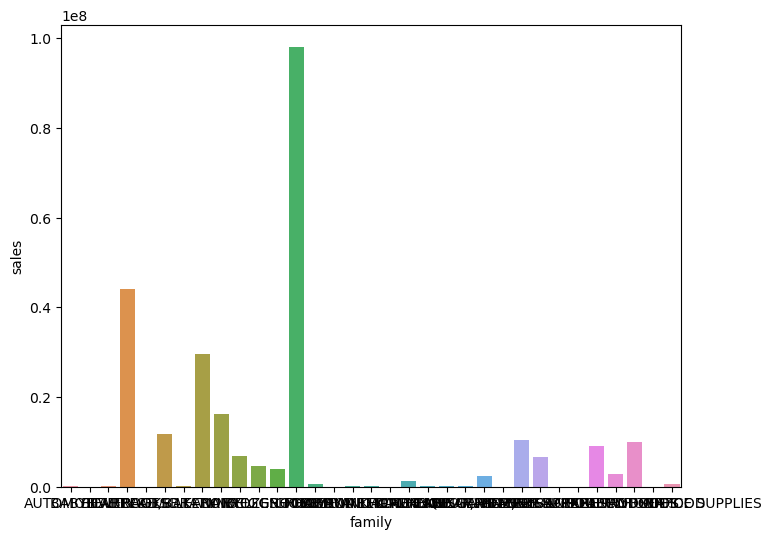

In [61]:
# Which family has the highest sales

family_with_highest_sales = train_data.groupby('family')['sales'].sum().reset_index()
plt.figure(figsize = (8,6))
sns.barplot(data=family_with_highest_sales, x='family', y='sales')

In [67]:
family_sales = family_with_highest_sales.sort_values(by=['sales'], ascending=False)

In [69]:
family_sales.head(10)

,family,sales
12,GROCERY I,9.815940e+07
3,BEVERAGES,4.417712e+07
7,CLEANING,2.949850e+07
8,DAIRY,1.612596e+07
5,BREAD/BAKERY,1.185250e+07
24,MEATS,1.048470e+07
30,PRODUCE,1.000709e+07
28,POULTRY,9.026394e+06
9,DELI,6.770108e+06
25,PERSONAL CARE,6.721624e+06


<AxesSubplot:xlabel='family', ylabel='sales'>

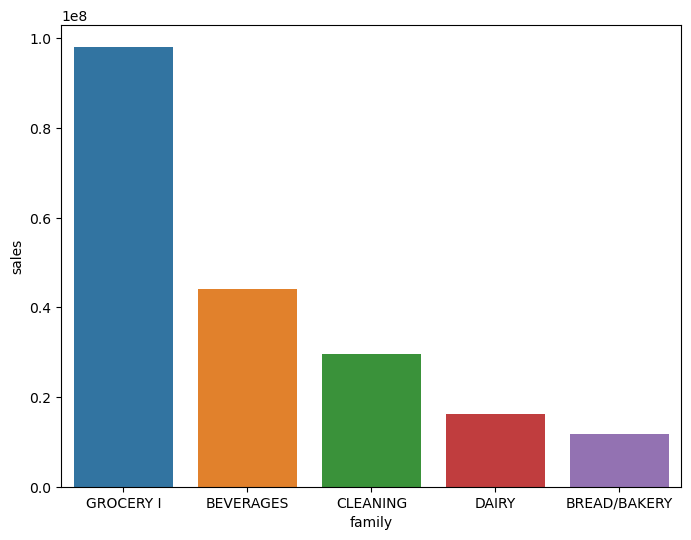

In [71]:
plt.figure(figsize = (8,6))
sns.barplot(data=family_sales.head(5), x='family', y='sales')

<AxesSubplot:xlabel='date'>

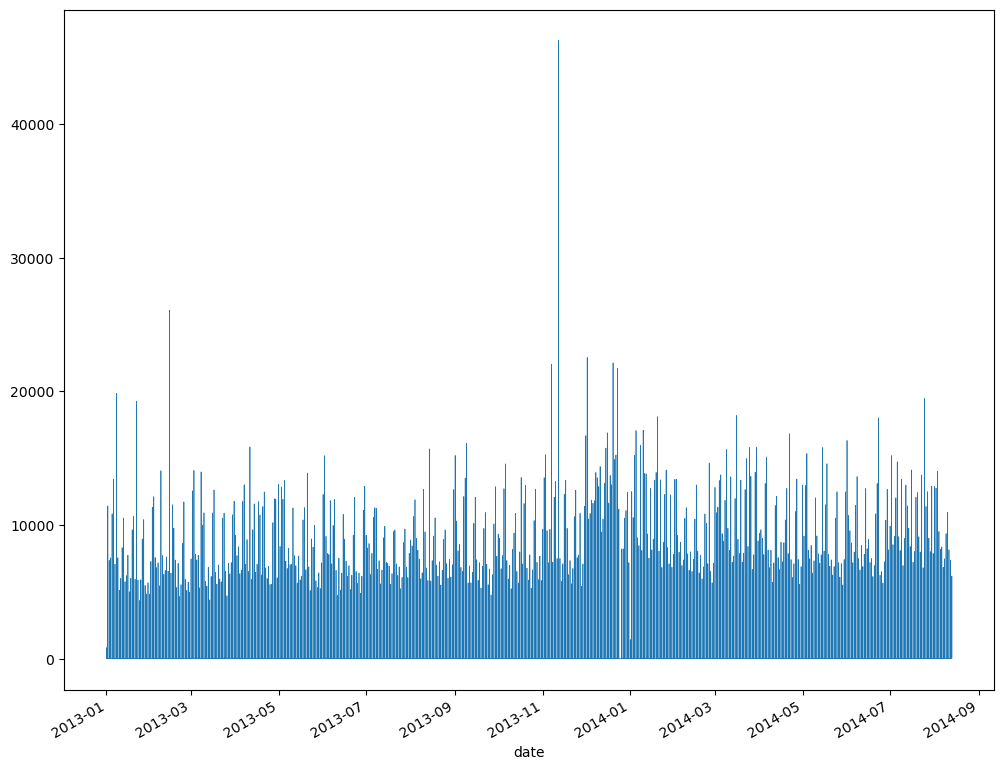

In [48]:
# Analysing the date column

plt.figure(figsize = (12,10))
train_data['sales'].plot(linewidth = 0.5)

<Figure size 1200x1000 with 0 Axes>

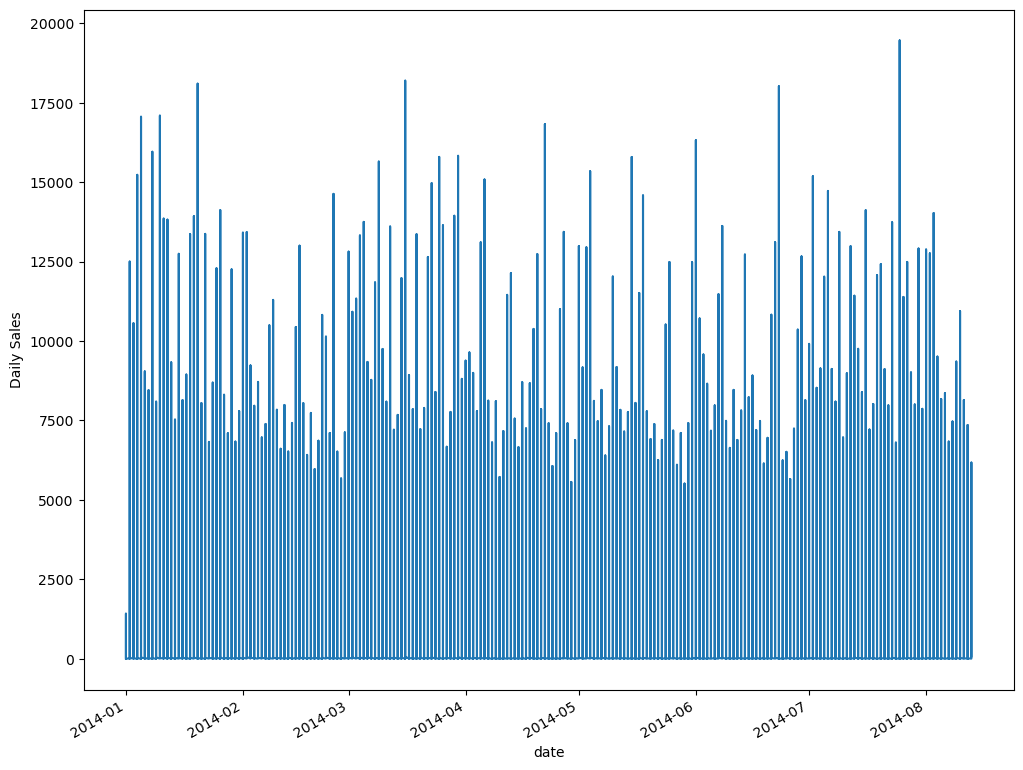

<Figure size 1200x1000 with 0 Axes>

In [49]:
# Plot on 2014 year

plt.figure(figsize = (12,10))
ax = train_data.loc['2014', 'sales'].plot()
ax.set_ylabel('Daily Sales');
plt.figure(figsize = (12,10))

<AxesSubplot:xlabel='date'>

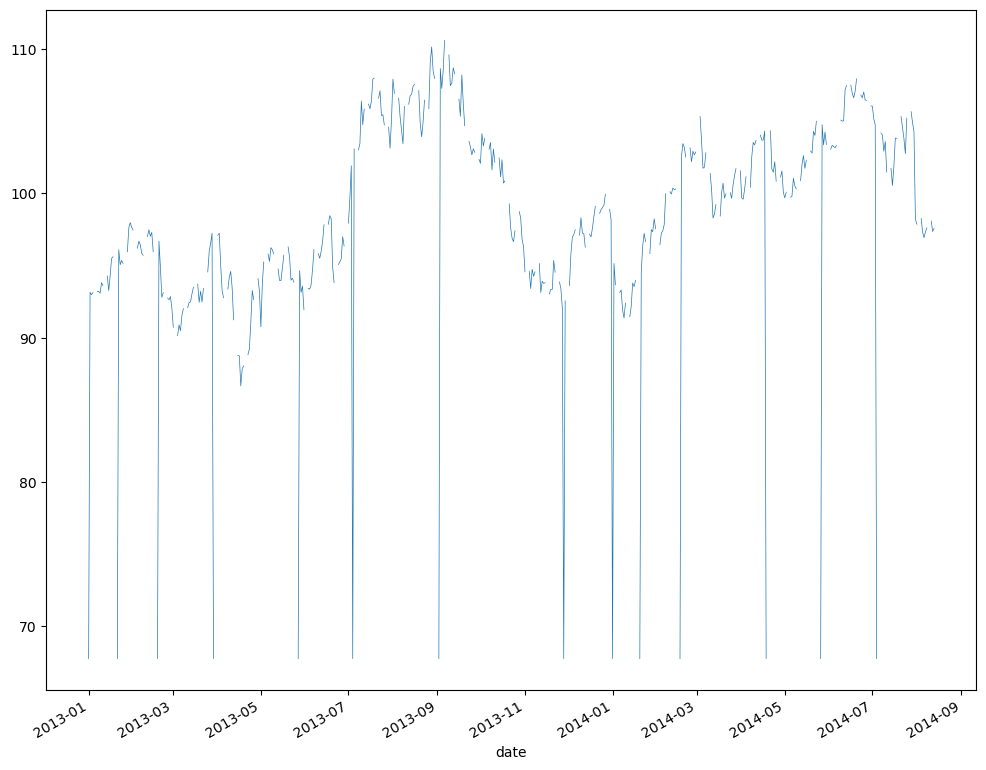

In [50]:
plt.figure(figsize = (12,10))
train_data['oil_prices'].plot(linewidth = 0.5)

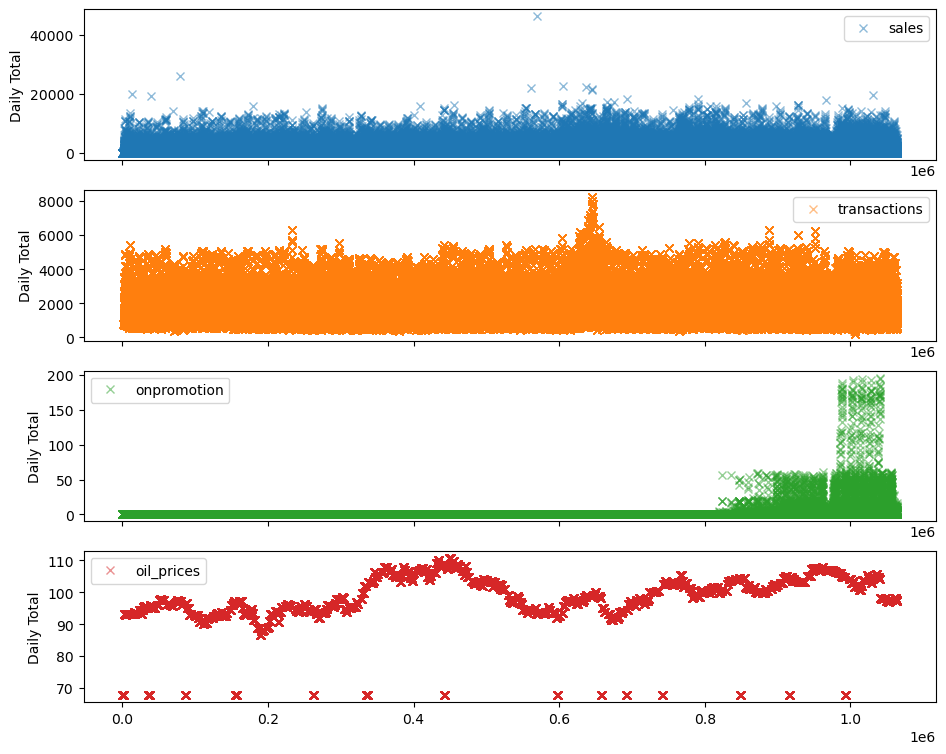

In [39]:
cols_plot = ['sales', 'transactions', 'onpromotion', 'oil_prices']
axes = train_data[cols_plot].plot(marker ='x', alpha = 0.5, linestyle = 'None', figsize = (11,9), subplots = True)
for ax in axes:
    ax.set_ylabel('Daily Total')
#plt.figure(figsize = (12,10))
#train_data['onpromotion'].plot(linewidth = 0.5)

From the graphs abocve we can deduce the following informations:

1) There is seasonality in the dataset

2) There is also trends in the dataset.

3) There is cyclical variation

## BIVARIATE ANALYSIS

Text(0.5, 1.0, 'RELATION BETWEEN SALES AND ONPROMOTION')

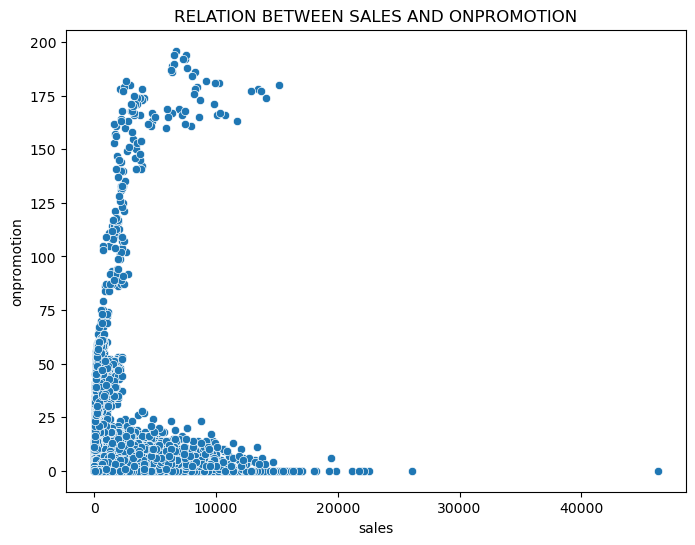

In [74]:
# RELATIONSHIP BETWEEN SALES AND ONPROMOTION

plt.figure(figsize=(8,6))
sns.scatterplot(train_data['sales'], train_data['onpromotion'])
plt.title('RELATION BETWEEN SALES AND ONPROMOTION')

## MULTIVARIATE ANALYSIS

WE SHALL USE RESAMPLING TO A LOWER FREQUENCY (DOWNSAMPLING) TO DO THE MULTIVARIATE ANALYSIS.

In [52]:
# SPECIFY THE COLUMNS TO INCLUDE

data_columns = ['sales', 'transactions', 'onpromotion', 'oil_prices']

# Resample to weekly frequency, aggregating with mean

data_weekly_mean = train_data[data_columns].resample('w').mean()

data_weekly_mean.head()

,sales,transactions,onpromotion,oil_prices
date,,,,
2013-01-06,206.843478,1883.203463,0.0,86.736092
2013-01-13,190.285220,1641.090062,0.0,93.379999
2013-01-20,189.835452,1639.024845,0.0,94.581999
2013-01-27,182.152050,1609.816770,0.0,89.872872
2013-02-03,198.564267,1685.263975,0.0,97.332001


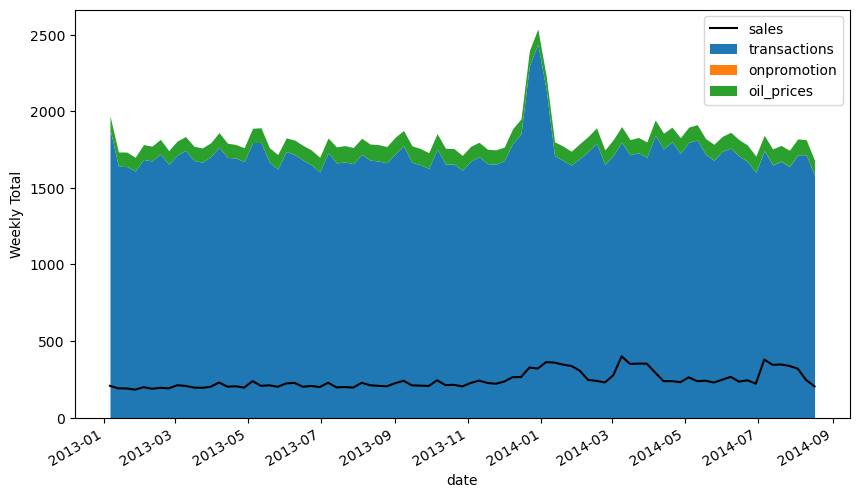

In [53]:
# Visualising the data_weekly_mean calculated above

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(data_weekly_mean['sales'], color='black', label = 'sales')
data_weekly_mean[['transactions', 'onpromotion', 'oil_prices']].plot.area(ax=ax, linewidth=0)
#ax.xaxis.set_major_locator(YearLocator())
ax.legend()
ax.set_ylabel('Weekly Total');

## CHECKING THE CORRELATION

In [42]:
train_data.corr()

,id,store_nbr,sales,onpromotion,transactions,oil_prices,cluster
id,1.000000,0.000050,0.043980,0.073746,0.017791,0.351186,0.000092
store_nbr,0.000050,1.000000,0.029457,-0.003826,0.185880,0.000058,-0.059487
sales,0.043980,0.029457,1.000000,0.089245,0.206597,0.011337,0.043177
onpromotion,0.073746,-0.003826,0.089245,1.000000,0.004254,0.025814,0.001458
transactions,0.017791,0.185880,0.206597,0.004254,1.000000,0.000446,0.201751
oil_prices,0.351186,0.000058,0.011337,0.025814,0.000446,1.000000,-0.000016
cluster,0.000092,-0.059487,0.043177,0.001458,0.201751,-0.000016,1.000000


<AxesSubplot:>

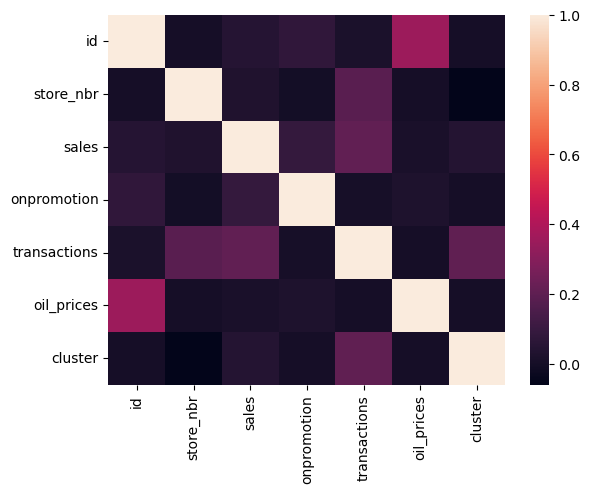

In [43]:
# Visualising the correlation with a heatmap

sns.heatmap(train_data.corr())

## HYPOTHESIS TESTING

Null Hypothesis:Sales are not affected by promotions, oil prices and holidays. 

Alternate Hypothesis: Sales are affected by promotions, oil prices and holidays

## ANSWERING SOME OF THE ANALYTICAL QUESTIONS

### 1. Is the train dataset complete (has all the required dates)?

In [ ]:
train.head()

In [ ]:
# CONVERTING THE DATE TO DATE TIME

train['date'] = pd.to_datetime(train['date'])

In [ ]:
# DETERMINING THE MIN AND MAX TIME
train['date'].min(), train['date'].max()

In [ ]:
# Extracting dates which are not in the train dataset

missing_dates=pd.date_range(start= '2013-01-01', end='2014-08-13').difference(train.date)

missing_dates

from the above, the train dataset does not have all the required date. The missing date is '2013-12-25'.

### TREATING THE MISSING DATE

In [ ]:
#to fix missing dates in the train dataset, we would import iterable product
#this will help us to loop over each item in the selected arguments 

#creating variables as arguments for the product() method

missing_dates
uniques_stores=train.store_nbr.unique()
unique_family=train.family.unique()

In [ ]:
#we will replace the missing dates by pairing it with all the unique stores and families

replace_dates=list(product(missing_dates, uniques_stores,unique_family ))

In [ ]:
#creating a dataframe for the replaced dates

replace_dates_df=pd.DataFrame(replace_dates, columns=['date', 'store_nbr', 'family'])

replace_dates_df.head()

In [ ]:
#adding replaced dates to our train data
new_train=pd.concat([train, replace_dates_df], ignore_index=True)

new_train.head()

In [ ]:
missing_dates=pd.date_range(start= '2013-01-01', end='2014-08-13').difference(new_train.date)

missing_dates

Now,there is no more missing dates.

In [ ]:
new_train.isnull().sum()

In [ ]:
#filling Nan values in sales and onpromotion column with 0

new_train.fillna(0,inplace=True)

new_train.isnull().sum()


In [ ]:
#dropping id column since it's not relevant

new_train=new_train.drop('id', axis='columns')

new_train.head()

## 2. Which dates have the lowest and highest sales for each year?

In [ ]:
# Making a copy of the new_train and storing it as train2

train2 = new_train.copy()

train2['Year'] = train2['date'].dt.year

In [ ]:
train2.head()

In [ ]:
# Calculating the aggregate Sales 

aggregate_sales = train2.groupby(['date']).agg(daily_sales=('sales', 'sum'), year=('Year', 'mean'))

aggregate_sales.head()

In [ ]:

aggregate_sales['year'] = aggregate_sales['year'].astype(int).astype(str)

In [ ]:
aggregate_sales.head()

In [ ]:
# Creating a function that will calculate the min_max sales for each year 

def min_max_sales(aggregate):
    unique_years = aggregate['year'].unique().tolist()
    for year in unique_years:
        year_agg = aggregate.loc[str(year)]
        max_sale = year_agg['daily_sales'].max()
        min_sale = year_agg['daily_sales'].min()
        print(f'The maximum and minimum sales in {year} are ${max_sale:,.2f} and ${min_sale:,.2f} respectively')

In [ ]:
min_max_sales(aggregate_sales)

## 3. Did the earthquake impact sales?

### A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

In [ ]:
new_train.head()

In [ ]:
# Extracting two weeks sales before the earthquake

start_date='2016-04-01'

end_date='2016-04-15'

#setting date to datetime

new_train['date']=pd.to_datetime(new_train['date'])

# getting start and end date using mask function to select rows between dates

mask = (new_train['date']>=start_date) & (new_train['date']<=end_date)

start_end_df_b4=new_train.loc[mask]

start_end_df_b4.head()

In [ ]:
start_end_df_b4